## Step 1: Install + Import Necessary Libraries

In [194]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn import model_selection 
from sklearn import metrics 

import folium
import plotly.express as px

## Step 2: Reading + Exploring Data

In [195]:
df_bmw=pd.read_csv("bmw_pricing_v2.csv")

In [196]:
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [197]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  4839 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [198]:
df_bmw.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4841.0,140959.347862,60208.534313,-64.0,102884.0,141080.0,175217.0,1000376.0
potencia,4842.0,128.981826,38.994839,0.0,100.0,120.0,135.0,423.0
precio,4837.0,15831.920612,9222.630708,100.0,10800.0,14200.0,18600.0,178500.0


In [199]:
df_bmw.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [200]:
len(df_bmw[df_bmw.duplicated()])

0

## Step 3: Analysis of each column

### Target = Price

<Axes: >

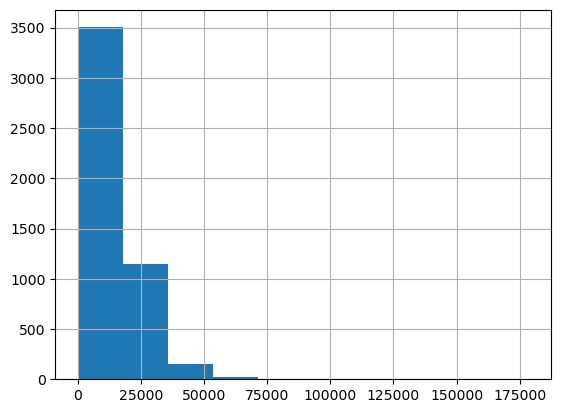

In [201]:
df_bmw['precio'].hist()

<Axes: xlabel='precio'>

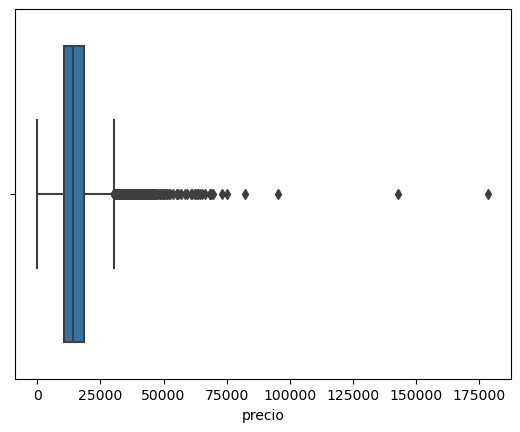

In [202]:
sns.boxplot(x=df_bmw["precio"])

In [203]:
len(df_bmw[df_bmw['precio'] < 500])

15

In [204]:
df_bmw[df_bmw['precio'] < 500]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
565,BMW,320,179358.0,120.0,2013-06-01,diesel,black,estate,False,True,False,False,False,False,True,True,100.0,2018-03-01
630,BMW,318,147558.0,105.0,2014-11-01,NaN,white,estate,False,True,False,False,False,False,False,True,100.0,2018-03-01
879,BMW,318,134156.0,105.0,2014-06-01,diesel,grey,estate,False,True,False,False,False,False,False,True,100.0,2018-04-01
1255,BMW,320,170381.0,135.0,2013-07-01,diesel,silver,estate,True,True,False,False,False,False,True,False,100.0,2018-05-01
1513,BMW,520,358332.0,100.0,2000-10-01,diesel,blue,estate,False,False,False,False,True,False,True,False,400.0,2018-07-01
1558,BMW,520,358333.0,100.0,2000-10-01,diesel,blue,estate,False,False,False,False,True,False,True,False,400.0,2018-07-01
1832,BMW,116,174524.0,85.0,2014-07-01,diesel,blue,hatchback,False,True,False,False,False,False,True,True,100.0,2018-03-01
2473,BMW,525,230578.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01
2574,BMW,525,229880.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01
2611,BMW,525,230264.0,85.0,1997-07-01,diesel,black,sedan,False,False,False,False,False,False,True,False,200.0,2018-08-01


In [205]:
# Delete prices < 500

df_bmw.drop(df_bmw[df_bmw['precio'] <500].index, inplace=True)

In [206]:
len(df_bmw[df_bmw['precio'] > 100000])

2

In [207]:
# Delete prices > 100.000

df_bmw.drop(df_bmw[df_bmw['precio'] > 100000].index, inplace=True)

<Axes: >

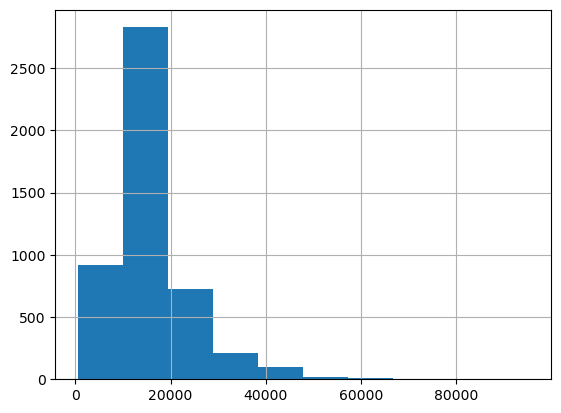

In [208]:
df_bmw['precio'].hist()

### Brand

In [209]:
df_bmw['marca'].value_counts() 

BMW    4824
Name: marca, dtype: int64

In [210]:
#Delete "brand" column

del(df_bmw['marca'])

### Type of Car

In [211]:
df_bmw['tipo_coche'].value_counts()

estate         1598
sedan          1160
suv            1054
hatchback       698
subcompact      113
coupe           104
convertible      47
van              43
Name: tipo_coche, dtype: int64

<Axes: xlabel='tipo_coche', ylabel='precio'>

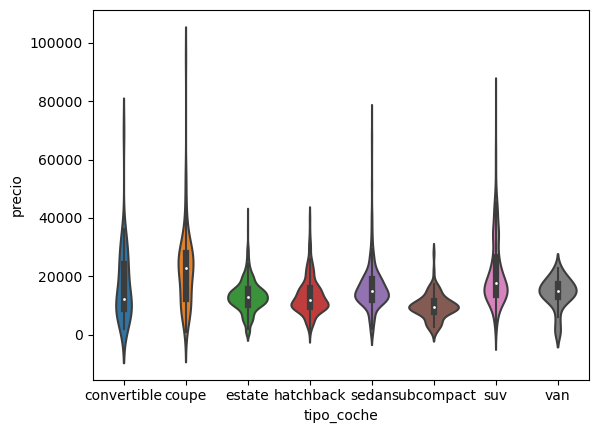

In [212]:
sns.violinplot(x="tipo_coche", y="precio", data=df_bmw)

### Model

In [213]:
df_bmw[df_bmw['modelo'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,NaN,146338.0,105.0,2014-01-01,diesel,black,estate,False,True,False,False,False,False,True,True,13300.0,2018-08-01
4766,NaN,115566.0,105.0,2014-01-01,diesel,silver,suv,False,True,False,True,True,False,True,False,14900.0,2018-09-01
4802,NaN,118640.0,110.0,2014-09-01,diesel,white,van,False,False,False,False,False,False,False,False,800.0,2018-03-01


In [214]:
len(df_bmw["modelo"].value_counts())

76

In [215]:
df_bmw[(df_bmw["modelo"] == "i8") & (df_bmw["precio"]>50000)]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
90,i8,12402.0,170.0,2016-01-01,hybrid_petrol,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01


In [216]:
df_bmw = df_bmw.drop(df_bmw[(df_bmw["modelo"] == "i8") & (df_bmw["precio"] > 50000)].index)

In [217]:
df_bmw[(df_bmw["modelo"] == "X3") & (df_bmw["precio"]>50000)]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [218]:
df_bmw = df_bmw.drop(df_bmw[(df_bmw["modelo"] == "X3") & (df_bmw["precio"] > 50000)].index)

In [219]:
df_bmw = df_bmw.drop(df_bmw[(df_bmw["modelo"] == "i8") & (df_bmw["precio"] > 1000)].index)

In [220]:
df_bmw[(df_bmw["modelo"] == "X5 M") & (df_bmw["precio"]>50000)]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4110,X5 M,25931.0,190.0,2016-01-01,diesel,white,suv,True,True,False,False,False,False,True,True,63100.0,2018-04-01
4731,X5 M,4530.0,230.0,2016-07-01,diesel,silver,suv,True,True,False,True,False,False,False,True,73100.0,2018-08-01


### Type of Gas

In [221]:
df_bmw[df_bmw['tipo_gasolina'].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
82,420,54993.0,135.0,2014-03-01,NaN,black,coupe,False,False,False,False,False,False,False,False,18400.0,2018-03-01
185,320,186697.0,135.0,2012-11-01,NaN,white,estate,False,False,False,False,False,False,False,True,2400.0,2018-04-01
444,318,111622.0,100.0,2013-01-01,NaN,black,estate,True,True,False,False,False,False,True,True,15400.0,2018-02-01
480,318,170350.0,105.0,2014-02-01,NaN,white,estate,False,True,False,False,False,False,True,False,10200.0,2018-02-01


In [222]:
df_bmw["tipo_gasolina"].value_counts()

diesel           4618
petrol            188
hybrid_petrol       7
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [223]:
# Unify Values

df_bmw["tipo_gasolina"]=df_bmw["tipo_gasolina"].replace({'diesel':'Diesel'}) 
df_bmw['tipo_gasolina'] = df_bmw['tipo_gasolina'].replace(['Hybrid Petrol', 'Electro'], 'petrol') 

In [224]:
df_bmw['tipo_gasolina'] = df_bmw['tipo_gasolina'].replace(['hybrid_petrol', 'electro'], 'petrol') 

In [225]:
df_bmw["tipo_gasolina"].value_counts()

Diesel    4623
petrol     198
Name: tipo_gasolina, dtype: int64

<Axes: xlabel='tipo_gasolina', ylabel='precio'>

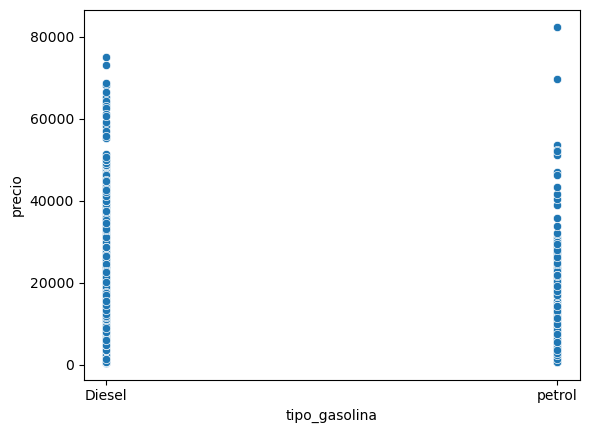

In [226]:
sns.scatterplot(x="tipo_gasolina", y="precio", data=df_bmw)

In [227]:
del(df_bmw['tipo_gasolina'])

### Color

In [228]:
df_bmw[df_bmw['color'].isnull()]

,modelo,km,potencia,fecha_registro,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
239,318,132731.0,100.0,2013-09-01,NaN,estate,True,True,False,False,False,False,True,True,12500.0,2018-01-01
834,318,148429.0,100.0,2013-06-01,NaN,estate,False,True,False,False,False,True,True,False,10500.0,2018-04-01
855,318,139736.0,100.0,2009-02-01,NaN,estate,False,False,False,False,False,False,True,False,5800.0,2018-04-01
864,318,157661.0,100.0,2013-06-01,NaN,estate,False,True,False,False,False,False,True,False,7700.0,2018-04-01
884,320,145981.0,122.0,2013-07-01,NaN,estate,True,True,False,False,True,True,True,False,15800.0,2018-04-01
904,320,126425.0,120.0,2013-07-01,NaN,estate,False,True,False,False,False,False,True,False,13000.0,2018-04-01
939,520,153102.0,140.0,2015-04-01,NaN,estate,True,True,True,False,True,False,True,False,19800.0,2018-04-01
1569,318,191804.0,100.0,2013-10-01,NaN,estate,False,True,False,False,True,True,True,False,3800.0,2018-07-01
1591,320,130624.0,120.0,2013-07-01,NaN,estate,True,True,False,False,False,False,True,True,10700.0,2018-07-01
1612,330,23811.0,190.0,2015-12-01,NaN,estate,True,True,True,False,False,False,True,True,28900.0,2018-08-01


In [229]:
df_bmw['color'].value_counts()

black     1627
grey      1166
blue       702
white      536
brown      341
silver     325
red         51
beige       41
green       18
orange       6
Name: color, dtype: int64

<Axes: xlabel='color', ylabel='precio'>

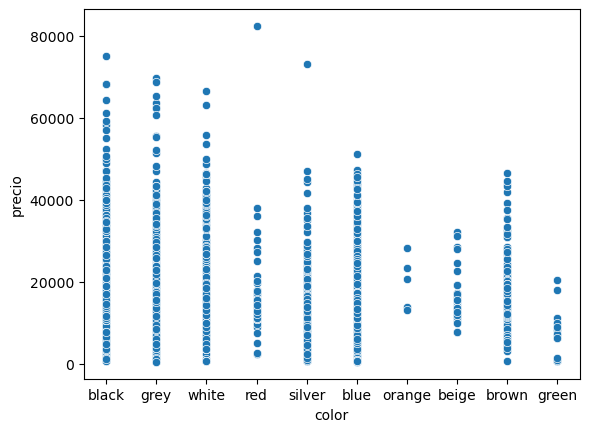

In [230]:
sns.scatterplot(x="color", y="precio", data=df_bmw)

In [231]:
del(df_bmw['color'])

In [232]:
df_bmw1 = df_bmw.copy()

In [233]:
df_bmw1.dropna(inplace = True)

In [234]:
df_bmw1.isnull().sum()

modelo                         0
km                             0
potencia                       0
fecha_registro                 0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_venta                    0
dtype: int64

### Registration date

In [235]:
df_bmw1['fecha_registro']=pd.to_datetime(df_bmw1['fecha_registro'])

df_bmw1['anio_registro']=df_bmw1['fecha_registro'].apply(lambda x:datetime.strftime(x,'%Y'))
df_bmw1['mes_registro'] = df_bmw1['fecha_registro'].apply(lambda x: datetime.strftime(x, '%m'))

In [236]:
df_bmw1["anio_registro"].value_counts()

2013    1527
2014    1270
2012     817
2015     310
2011     214
2010     103
2008     102
2009      85
2016      82
2006      67
2007      58
2005      52
2004      26
2001      17
2003      16
2017      11
2002       8
2000       8
1999       3
1998       2
1996       1
1995       1
1990       1
1997       1
Name: anio_registro, dtype: int64

In [237]:
df_bmw1["mes_registro"].value_counts()

03    464
01    452
10    446
07    445
06    442
05    435
09    416
04    406
02    393
11    343
08    331
12    209
Name: mes_registro, dtype: int64

In [238]:
df_bmw1['fecha_venta']=pd.to_datetime(df_bmw1['fecha_venta'])

df_bmw1['anio_venta']=df_bmw1['fecha_venta'].apply(lambda x:datetime.strftime(x,'%Y'))
df_bmw1['mes_venta'] = df_bmw1['fecha_venta'].apply(lambda x: datetime.strftime(x, '%m'))

In [239]:
df_bmw1["anio_venta"].value_counts()

2018    4778
2007       1
2010       1
2009       1
2008       1
Name: anio_venta, dtype: int64

In [240]:
del(df_bmw1['anio_venta'])

In [241]:
df_bmw1["mes_venta"].value_counts()

05    804
03    726
04    688
06    599
07    532
08    519
02    490
09    220
01    204
Name: mes_venta, dtype: int64

In [242]:
del(df_bmw1['fecha_registro'])
del(df_bmw1['fecha_venta'])

### Booleans

In [243]:
variables_boolenas = ["tipo_coche", "volante_regulable", "aire_acondicionado", "camara_trasera", "asientos_traseros_plegables", "elevacunas_electrico", "bluetooth", "gps", "alerta_lim_velocidad"]

In [244]:
for i in range(len(variables_boolenas)):
    variables_boolenas[i] = bool(variables_boolenas[i])

### Adjustable steering wheel

In [245]:
df_bmw1["volante_regulable"].value_counts() #It has a good distribution, we will leave it as it is relevant to the model.

True     2638
False    2144
Name: volante_regulable, dtype: int64

<Axes: xlabel='volante_regulable', ylabel='precio'>

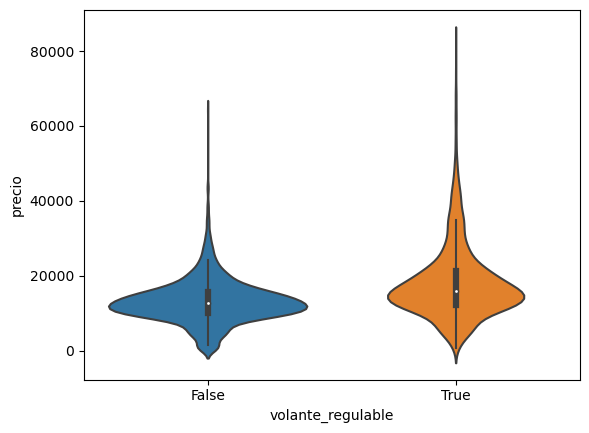

In [246]:
sns.violinplot(x="volante_regulable", y="precio", data=df_bmw1) 

### Air conditioning

In [247]:
df_bmw1["aire_acondicionado"].value_counts() #It has 80-20 distribution, we will leave it as it is relevant for the model.

True     3807
False     975
Name: aire_acondicionado, dtype: int64

### Back camera

In [248]:
df_bmw1["camara_trasera"].value_counts() #It has 80-20 distribution, we will leave it as it is relevant for the model.

False    3817
True      965
Name: camara_trasera, dtype: int64

<Axes: xlabel='camara_trasera', ylabel='precio'>

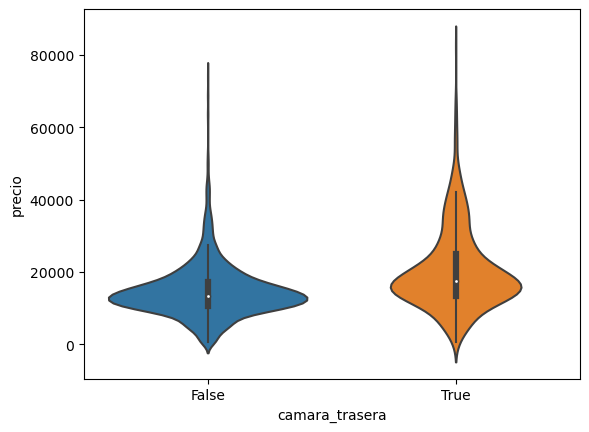

In [249]:
sns.violinplot(x="camara_trasera", y="precio", data=df_bmw1)

### Rear folding seats

In [250]:
df_bmw1["asientos_traseros_plegables"].value_counts() #It has 80-20 distribution, we will leave it as it is relevant for the model.

False    3824
True      958
Name: asientos_traseros_plegables, dtype: int64

<Axes: xlabel='asientos_traseros_plegables', ylabel='precio'>

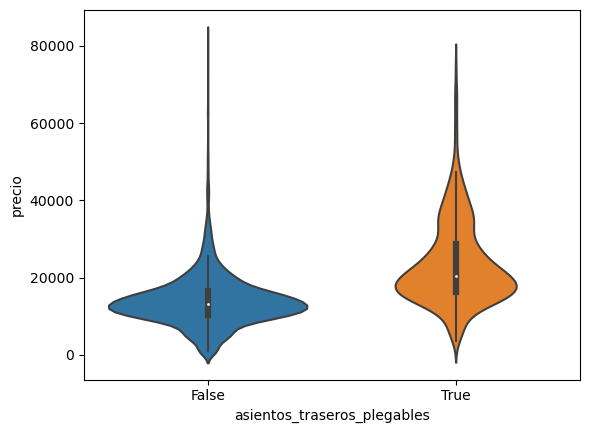

In [251]:
sns.violinplot(x="asientos_traseros_plegables", y="precio", data=df_bmw1)

### Electric window lifter

In [252]:
df_bmw1["elevalunas_electrico"].value_counts() #It has a good distribution, we will leave it as it is relevant to the model.

False    2575
True     2207
Name: elevalunas_electrico, dtype: int64

<Axes: xlabel='elevalunas_electrico', ylabel='precio'>

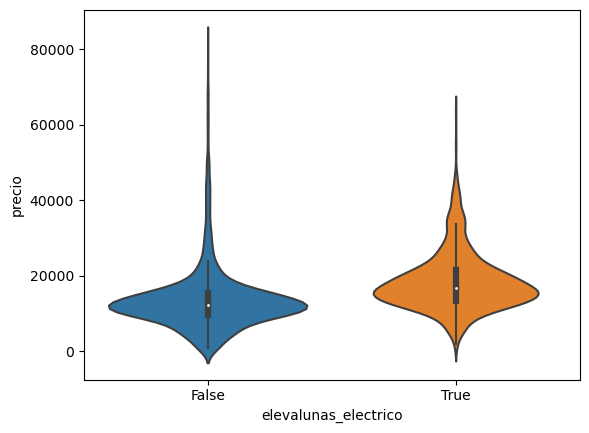

In [253]:
sns.violinplot(x="elevalunas_electrico", y="precio", data=df_bmw1)

### Bluetooth

In [254]:
df_bmw1["bluetooth"].value_counts() #It has a good distribution, we will leave it as it is relevant to the model.

False    3622
True     1160
Name: bluetooth, dtype: int64

<Axes: xlabel='bluetooth', ylabel='precio'>

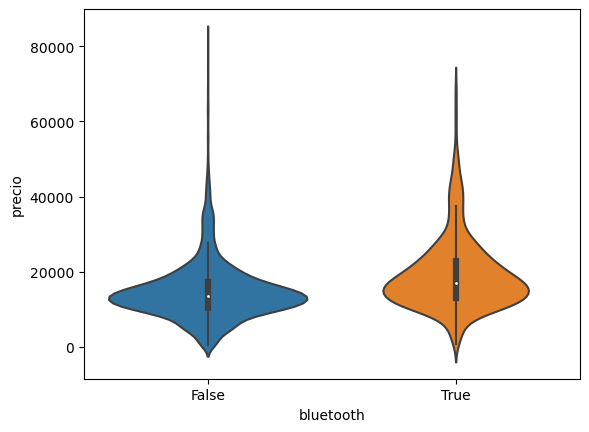

In [255]:
sns.violinplot(x="bluetooth", y="precio", data=df_bmw1)

### GPS

In [256]:
df_bmw1["gps"].value_counts() #It has 90-10 distribution, we will leave it as it is relevant for the model.

True     4462
False     320
Name: gps, dtype: int64

<Axes: xlabel='gps', ylabel='precio'>

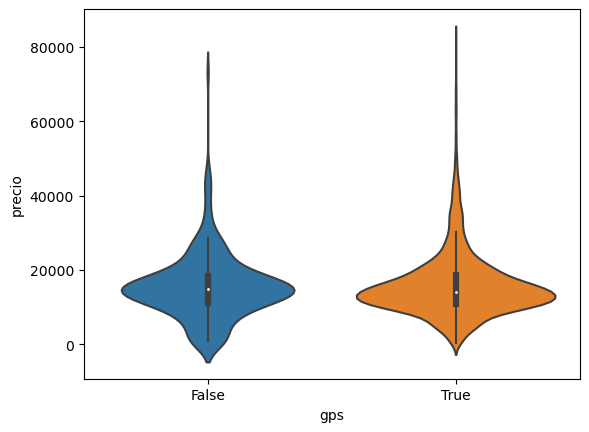

In [257]:
sns.violinplot(x="gps", y="precio", data=df_bmw1)

### Speed limit alert

In [258]:
df_bmw1["alerta_lim_velocidad"].value_counts() #It has a good distribution, we will leave it as it is relevant to the model. 

True     2588
False    2194
Name: alerta_lim_velocidad, dtype: int64

<Axes: xlabel='alerta_lim_velocidad', ylabel='precio'>

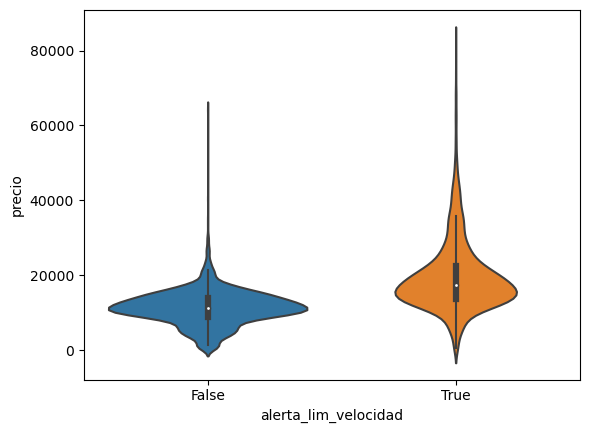

In [259]:
sns.violinplot(x="alerta_lim_velocidad", y="precio", data=df_bmw1)

### KM

In [260]:
df_bmw1.head()

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,anio_registro,mes_registro,mes_venta
0,118,140411.0,100.0,convertible,True,True,False,False,True,True,True,False,11300.0,2012,02,01
1,M4,13929.0,317.0,convertible,True,True,False,False,False,True,True,True,69700.0,2016,04,02
2,320,183297.0,120.0,convertible,False,False,False,False,True,False,True,False,10200.0,2012,04,02
3,420,128035.0,135.0,convertible,True,True,False,False,True,True,True,True,25100.0,2014,07,02
4,425,97097.0,160.0,convertible,True,True,False,False,False,True,True,True,33400.0,2014,12,04


<Axes: xlabel='km', ylabel='precio'>

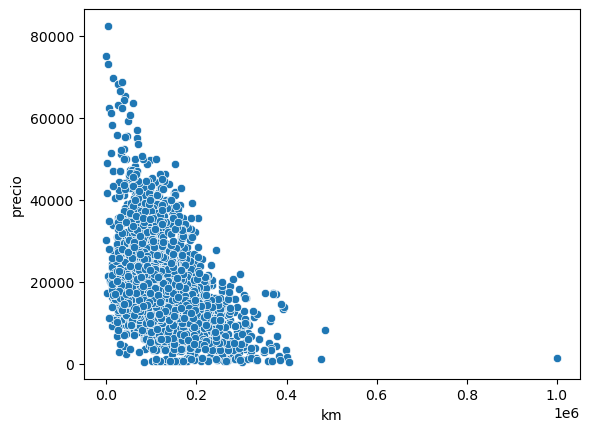

In [261]:
sns.scatterplot(x="km", y="precio", data=df_bmw1)

#We will analyse the outliers

In [262]:
df_bmw1[df_bmw1["km"]<100] #We validate if there are too low values.

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,anio_registro,mes_registro,mes_venta
2938,640 Gran Coupé,-64.0,230.0,sedan,True,True,False,True,False,False,True,True,75000.0,2017,03,04


In [263]:
df_bmw1.drop(df_bmw1[df_bmw1['km'] <0].index, inplace=True) #Eliminate negative km

In [264]:
df_bmw1[df_bmw1["km"]>400000] #We validate if there are too high values.

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,anio_registro,mes_registro,mes_venta
557,520,484615.0,120.0,estate,True,True,False,False,False,False,True,False,8300.0,2011,02,03
1573,320,400654.0,110.0,estate,False,False,True,False,False,False,True,False,1800.0,2006,12,07
2350,318,477571.0,85.0,hatchback,False,True,False,False,False,True,False,False,1200.0,2004,09,07
3198,320,405816.0,100.0,sedan,False,False,False,False,False,False,True,False,500.0,2000,02,05
3732,118,1000376.0,90.0,subcompact,True,False,False,False,False,False,True,False,1400.0,2005,03,06


In [265]:
df_bmw1.drop(df_bmw1[df_bmw1['km'] >1000000].index, inplace=True) #Delete KM > 1M

<Axes: xlabel='km', ylabel='precio'>

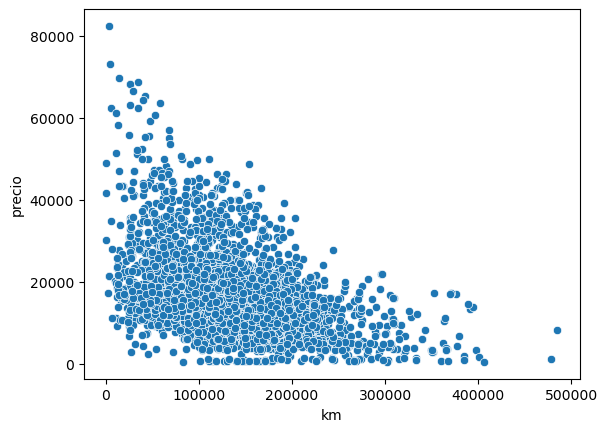

In [266]:
sns.scatterplot(x="km", y="precio", data=df_bmw1) #It is related: the lower the kilometres, the higher the price.

### Power

In [267]:
df_bmw2 = df_bmw1.copy() 

<Axes: xlabel='potencia', ylabel='precio'>

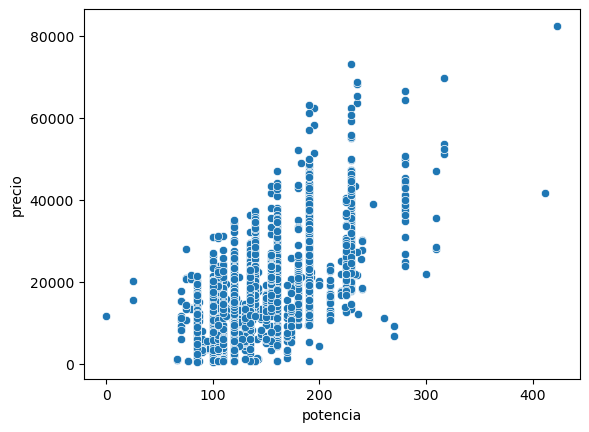

In [268]:
sns.scatterplot(x="potencia", y="precio", data=df_bmw2)

#It's not so linear, but you can see the trend: the higher the price, the higher the power.

In [269]:
df_bmw2[df_bmw2["potencia"]<70] #We see that there are 5 rows with power less than a power of 70

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,anio_registro,mes_registro,mes_venta
1796,i3,152328.0,25.0,hatchback,False,True,False,False,False,False,True,True,20300.0,2014,02,04
1925,i3,152470.0,25.0,hatchback,False,True,False,False,False,False,True,True,15500.0,2014,02,03
2390,318,170529.0,66.0,hatchback,False,False,True,False,False,False,False,False,1000.0,2000,05,08
2771,316,146951.0,66.0,sedan,False,False,False,False,False,False,False,False,1300.0,1990,03,04
3765,X1,81770.0,0.0,suv,False,False,False,False,False,False,False,False,11700.0,2014,10,03


In [270]:
df_bmw2.drop(df_bmw2[df_bmw2["potencia"] < 70].index, inplace=True)

<Axes: xlabel='potencia', ylabel='precio'>

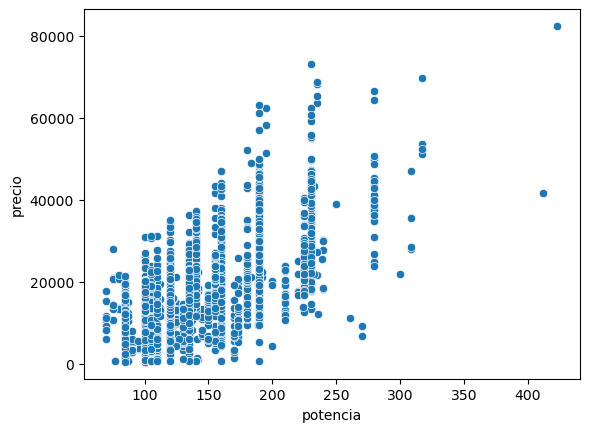

In [271]:
sns.scatterplot(x="potencia", y="precio", data=df_bmw2) 

In [272]:
df_bmw2[df_bmw2["potencia"]>350] #We analyse possible outliers

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,anio_registro,mes_registro,mes_venta
3601,M5,150187.0,412.0,sedan,True,True,True,False,True,True,True,True,41600.0,2012,02,09
4146,X6 M,2970.0,423.0,suv,True,True,True,False,False,False,True,True,82400.0,2016,04,04


In [273]:
df_bmw2[df_bmw2["modelo"] == "X6 M"] #We remove the row with power in 423 as it corresponds to an outlier when compared to the rest of the rows of the same car model.

,modelo,km,potencia,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,anio_registro,mes_registro,mes_venta
3829,X6 M,39725.0,280.0,suv,False,True,False,True,True,True,True,False,64300.0,2016,05,01
3986,X6 M,115569.0,280.0,suv,True,True,False,True,False,True,True,True,34800.0,2013,06,06
4109,X6 M,67798.0,190.0,suv,True,True,True,True,False,True,True,True,57100.0,2015,02,03
4146,X6 M,2970.0,423.0,suv,True,True,True,False,False,False,True,True,82400.0,2016,04,04
4166,X6 M,53221.0,180.0,suv,True,True,True,True,False,True,True,True,42800.0,2014,04,04
4282,X6 M,90157.0,190.0,suv,True,True,True,True,True,True,True,True,48800.0,2015,05,05
4535,X6 M,94673.0,225.0,suv,True,True,True,True,False,False,True,True,39500.0,2013,10,07
4557,X6 M,124726.0,280.0,suv,True,True,True,True,True,True,True,True,38700.0,2013,07,07


In [274]:
df_bmw2.drop(df_bmw2[df_bmw2["potencia"] > 420].index, inplace=True)

### Price (Target)

In [275]:
df_bmw3 = df_bmw2.copy()

<Axes: xlabel='precio'>

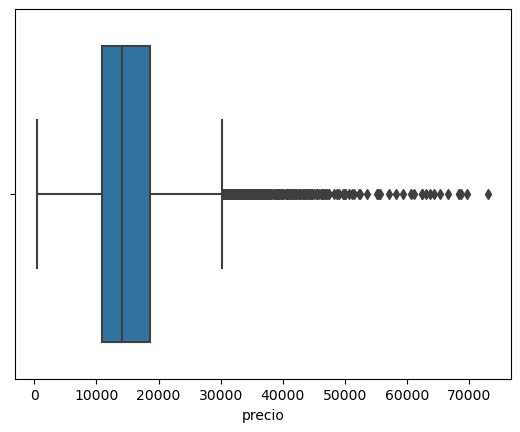

In [276]:
sns.boxplot(x=df_bmw3["precio"]) 

#We see that there are outliers, we proceed to analyse them.

<Axes: >

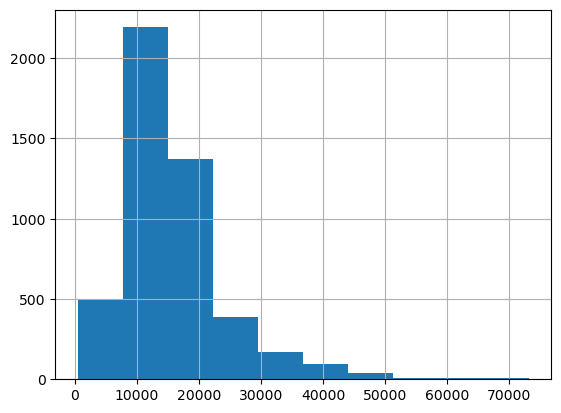

In [277]:
df_bmw3["precio"].hist() #We will standardise the TARGET

In [278]:
df_bmw3['precioLN'] = df_bmw3['precio'].apply(lambda x: np.log1p(x))
TARGET_LN = 'precioLN'

<Axes: >

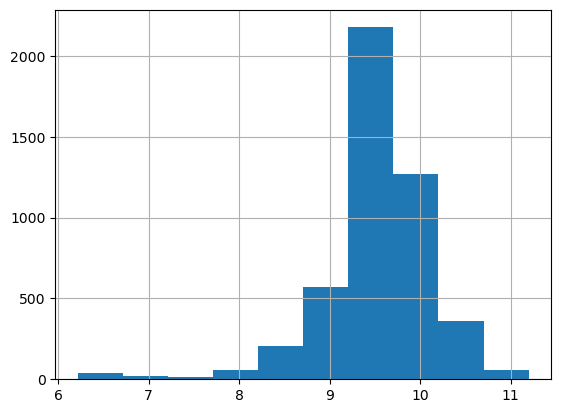

In [279]:
df_bmw3["precioLN"].hist()

## Step 4: Transformations - OHE & Minmaxscaler

In [280]:
df_bmw4 = df_bmw3.copy()

In [281]:
df_bmw4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4774 entries, 0 to 4841
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4774 non-null   object 
 1   km                           4774 non-null   float64
 2   potencia                     4774 non-null   float64
 3   tipo_coche                   4774 non-null   object 
 4   volante_regulable            4774 non-null   object 
 5   aire_acondicionado           4774 non-null   object 
 6   camara_trasera               4774 non-null   object 
 7   asientos_traseros_plegables  4774 non-null   object 
 8   elevalunas_electrico         4774 non-null   object 
 9   bluetooth                    4774 non-null   object 
 10  gps                          4774 non-null   bool   
 11  alerta_lim_velocidad         4774 non-null   object 
 12  precio                       4774 non-null   float64
 13  anio_registro     

In [282]:
df_bmw4["potencia"] = MinMaxScaler().fit_transform(df_bmw4["potencia"].values.reshape(-1,1)) #We replace with a minmaxscaler the power column

In [283]:
df_bmw4["km"] = MinMaxScaler().fit_transform(df_bmw4["km"].values.reshape(-1,1)) #We replace with a minmaxscaler the column km

In [284]:
# Create a list of Boolean columns
variables_boolenas = ["tipo_coche", "volante_regulable", "aire_acondicionado", "camara_trasera", "asientos_traseros_plegables", "elevalunas_electrico", "bluetooth", "gps", "alerta_lim_velocidad", "anio_registro", "mes_registro", "mes_venta", "modelo"]

# Iterate over each Boolean column
for column in variables_boolenas:
    # Apply One-Hot Encoding to the current column
    encoded_columns = pd.get_dummies(df_bmw4[column], prefix=column)

    # Concatenate the resulting DataFrame with the transformed column
    df_bmw4 = pd.concat([df_bmw4, encoded_columns], axis=1)

# Delete the original Boolean columns
df_bmw4 = df_bmw4.drop(variables_boolenas, axis=1)

In [285]:
df_bmw4.head()

,km,potencia,precio,precioLN,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,...,modelo_X1,modelo_X3,modelo_X4,modelo_X5,modelo_X5 M,modelo_X5 M50,modelo_X6,modelo_X6 M,modelo_Z4,modelo_i3
0,0.289039,0.087719,11300.0,9.332646,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.027787,0.722222,69700.0,11.151970,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.377621,0.146199,10200.0,9.230241,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.263476,0.190058,25100.0,10.130663,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.199573,0.263158,33400.0,10.416341,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 5: Modeling

In [286]:
#We decided to use randomisation to partition the model.

p_dev = 0.70 #Percentage of train

df_bmw4['is_train'] = np.random.uniform(0, 1, len(df_bmw4)) <= p_dev
dev_df_bmw4, val_df_bmw4 = df_bmw4[df_bmw4['is_train']==True], df_bmw4[df_bmw4['is_train']==False]
df_bmw4 = df_bmw4.drop('is_train', 1)

print("Ejemplos usados para entrenar: ", len(dev_df_bmw4))
print("Ejemplos usados para validación: ", len(val_df_bmw4))

Ejemplos usados para entrenar:  3319
Ejemplos usados para validación:  1455


C:\Users\xavim\AppData\Local\Temp\ipykernel_25000\4255033736.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_bmw4 = df_bmw4.drop('is_train', 1)


### Assignment of attributes and target to variables X and Y

In [287]:
dev_df_bmw4_X = dev_df_bmw4.drop('precio', axis=1)
dev_df_bmw4_y = dev_df_bmw4[['precio']]

In [288]:
val_df_bmw4_X = val_df_bmw4.drop('precio', axis=1)
val_ddf_bmw4_y = val_df_bmw4[['precio']]

### Random Hold Out

In [289]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        dev_df_bmw4_X, # X
                                        dev_df_bmw4_y, # y
                                        test_size = 0.20, 
                                        random_state = 1279
                                     )

### Previous checks

In [290]:
dev_df_bmw4_X.head().T

,1,3,5,6,7
km,0.027787,0.263476,0.313703,0.422901,0.237709
potencia,0.722222,0.190058,0.453216,0.219298,0.102339
precioLN,11.15197,10.130663,9.746892,9.425532,8.716208
tipo_coche_convertible,1,1,1,1,1
tipo_coche_coupe,0,0,0,0,0
...,...,...,...,...,...
modelo_X6,0,0,0,0,0
modelo_X6 M,0,0,0,0,0
modelo_Z4,0,0,0,0,0
modelo_i3,0,0,0,0,0


In [291]:
X_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2655 entries, 1288 to 1457
Columns: 147 entries, km to is_train
dtypes: bool(1), float64(3), uint8(143)
memory usage: 456.3 KB


In [292]:
X_test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 2816 to 1549
Columns: 147 entries, km to is_train
dtypes: bool(1), float64(3), uint8(143)
memory usage: 114.1 KB


In [293]:
X_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
km,2655.0,0.289496,0.119393,0.000000,0.212478,0.288363,0.360986,0.813112
potencia,2655.0,0.172039,0.111688,0.000000,0.087719,0.146199,0.190058,0.722222
precioLN,2655.0,9.516499,0.592967,6.398595,9.287394,9.561068,9.830971,11.151970
tipo_coche_convertible,2655.0,0.011299,0.105716,0.000000,0.000000,0.000000,0.000000,1.000000
tipo_coche_coupe,2655.0,0.018832,0.135958,0.000000,0.000000,0.000000,0.000000,1.000000


In [294]:
X_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
km,664.0,0.283309,0.126579,0.005507,0.205153,0.282573,0.352282,1.000000
potencia,664.0,0.172092,0.117895,0.000000,0.087719,0.146199,0.190058,0.722222
precioLN,664.0,9.519492,0.593931,6.216606,9.287394,9.561068,9.846970,11.199597
tipo_coche_convertible,664.0,0.009036,0.094700,0.000000,0.000000,0.000000,0.000000,1.000000
tipo_coche_coupe,664.0,0.027108,0.162522,0.000000,0.000000,0.000000,0.000000,1.000000


In [295]:
y_train.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
precio,2655.0,15715.141243,8478.344934,600.0,10800.0,14200.0,18600.0,69700.0


In [296]:
y_test.describe().T.head()

,count,mean,std,min,25%,50%,75%,max
precio,664.0,15800.753012,8703.269061,500.0,10800.0,14200.0,18900.0,73100.0


## Step 6: Model Definition - RandomFOrestRegression

### Importamos librerias

In [301]:
from sklearn.ensemble import RandomForestRegressor


In [302]:
modelo_rf = RandomForestRegressor(n_estimators = 20, random_state = 2022)
modelo_rf.fit(dev_df_bmw4_X, dev_df_bmw4_y)

C:\Users\xavim\AppData\Local\Temp\ipykernel_25000\2862084681.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelo_rf.fit(dev_df_bmw4_X, dev_df_bmw4_y)


RandomForestRegressor(n_estimators=20, random_state=2022)

In [303]:
predicciones_rf = modelo_rf.predict(X_test)
predicciones_rf

array([24505.,  6000., 13600.,  9900., 10100., 24000., 10800., 32530.,
       13300.,  1950., 10500., 16700.,  8600., 12000.,  4200., 12900.,
       12000., 17500., 12000., 15500., 26205., 46075., 20305., 20800.,
       12500., 13100.,  8400., 14300., 17500., 13100., 13200., 32525.,
       27620., 14800., 18295., 14600.,  3020., 16900., 11200., 11900.,
       18695., 35450.,  6000., 13900., 12900.,  9300., 34525., 13400.,
        5000., 21500., 14500., 16900., 13800., 20500., 15800., 20800.,
       15600.,  9000., 19000., 20000., 19200., 13400., 14000., 29800.,
       13100., 19400., 13100., 14000.,   800.,  9000., 11500., 13100.,
       15400., 14400., 15800., 28600., 45410., 11900., 14300., 13100.,
       15000., 12000., 15800., 10100.,  4300.,  8900., 13300., 11700.,
        7100.,  3500., 13200., 12700., 11300.,   800., 13300., 17300.,
       12900., 14300., 11700., 14500.,  4800., 14300., 16100., 10200.,
       12100., 26205., 13200., 12600., 19800.,  7500., 14300.,  9200.,
      

In [304]:
comparaciones = pd.DataFrame(X_test)
comparaciones = comparaciones.assign(Precio_Real = y_test)
comparaciones = comparaciones.assign(Precio_Prediction = predicciones_rf.flatten().tolist())
print(comparaciones)

            km  potencia   precioLN  tipo_coche_convertible  tipo_coche_coupe  \
2816  0.249011  0.350877  10.106469                       0                 0   
2971  0.700708  0.190058   8.699681                       0                 0   
2751  0.189861  0.043860   9.517899                       0                 0   
407   0.527322  0.146199   9.200391                       0                 0   
2263  0.121818  0.043860   9.220390                       0                 0   
...        ...       ...        ...                     ...               ...   
3526  0.455921  0.146199   8.699681                       0                 0   
1747  0.404909  0.146199   9.059634                       0                 0   
1247  0.383993  0.146199   9.472782                       0                 0   
3574  0.145958  0.043860   9.401043                       0                 0   
1549  0.389388  0.043860   9.082621                       0                 0   

      tipo_coche_estate  ti

## Step 7: RMSE Modelo AR

### Importamos librerias

In [305]:
from sklearn.metrics import mean_squared_error, r2_score

In [306]:
rmse_rf = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones_rf,
        squared = False
        ) 
print(f"El error (rmse) de test es: {rmse_rf}")

El error (rmse) de test es: 121.04169474800771
